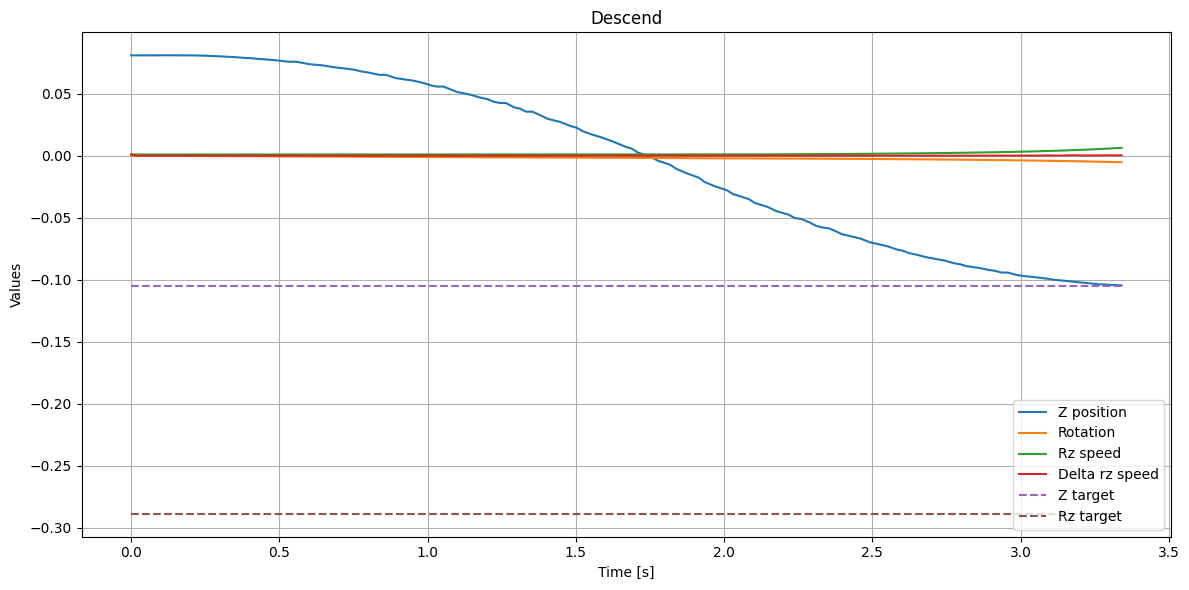

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("descend/positions_2025-08-06_15-03-42.csv")

# Optional: convert raw timestamp to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Plotting
plt.figure(figsize=(12, 6))
plt.clf() 
plt.plot(df["relative_time"], df["z_pos"], label="Z position")
plt.plot(df["relative_time"], df["rotation"], label="Rotation")
#plt.plot(df["relative_time"], df["z_speed"], label="Z speed")
plt.plot(df["relative_time"], df["rz_speed"], label="Rz speed")
plt.plot(df["relative_time"], df["delta_rz_speed"], label="Delta rz speed")
plt.plot(df["relative_time"], df["z_target"], label="Z target", linestyle="--")
plt.plot(df["relative_time"], df["rz_target"], label="Rz target", linestyle="--")

plt.xlabel("Time [s]")
plt.ylabel("Values")
plt.title("Descend")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

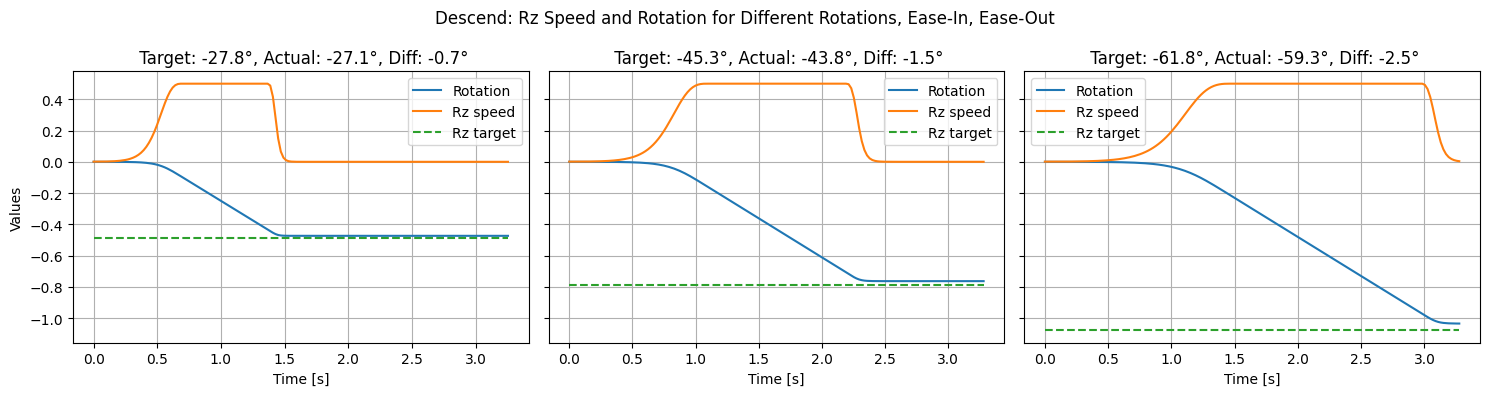

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
plot1 = pd.read_csv("plots_for_thesis/small_rotation2.csv")
plot2 = pd.read_csv("plots_for_thesis/medium_rotation2.csv")
plot3 = pd.read_csv("plots_for_thesis/big_rotation2.csv")

# Convert time to relative time for each DataFrame
for df in [plot1, plot2, plot3]:
    df["relative_time"] = df["time"] - df["time"].iloc[0]

# Extract rz_target (assumes it's constant per file)
def extract_target(df):
    target_rad = df["rz_target"].iloc[0]
    target_deg = round(target_rad * 180 / 3.14159, 1)  # radians to degrees
    return target_deg

targets_deg = [extract_target(df) for df in [plot1, plot2, plot3]]

# Calculate the final actual rotation in degrees and difference
def extract_final_rotation_and_diff(df, target_deg):
    # Take the last rotation value (assumed radians)
    actual_rad = df["rotation"].iloc[-1]
    actual_deg = round(actual_rad * 180 / 3.14159, 1)
    difference = round(target_deg - actual_deg, 1)
    return actual_deg, difference

final_rotations_diffs = [extract_final_rotation_and_diff(df, tgt) for df, tgt in zip([plot1, plot2, plot3], targets_deg)]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

base_titles = ["", "", ""]
plots = [plot1, plot2, plot3]

for i, data in enumerate(plots):
    target_deg = targets_deg[i]
    actual_deg, diff = final_rotations_diffs[i]
    title = f"{base_titles[i]} Target: {target_deg}°, Actual: {actual_deg}°, Diff: {diff}°"
    
    axs[i].plot(data["relative_time"], data["rotation"], label="Rotation", color='tab:blue')
    axs[i].plot(data["relative_time"], data["rz_speed"], label="Rz speed", color='tab:orange')
    axs[i].plot(data["relative_time"], data["rz_target"], label="Rz target", color='tab:green', linestyle="--")
    axs[i].set_title(title)
    axs[i].set_xlabel("Time [s]")
    axs[i].grid(True)
    axs[i].legend()

axs[0].set_ylabel("Values")
fig.suptitle("Descend: Rz Speed and Rotation for Different Rotations, Ease-In, Ease-Out")
plt.tight_layout()
plt.show()
